In [ ]:
## importing librarys

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from scipy.stats import boxcox

In [ ]:
## reading data

In [5]:
pd.set_option('display.max_columns', None)

In [8]:
fifa = pd.read_csv('C:/Users/ivanr/fifa/data_mid_bootcamp_project_FIFA_MoneyBall/fifa21_male2.csv')
fifa.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [ ]:
# DATA CLEANING

In [ ]:
# standardazing header names

In [9]:
lower_col = []
for col in fifa.columns:
    lower_col.append(col.lower().replace(' ', '_'))

In [10]:
fifa.columns = lower_col


In [11]:
fifa.head()

,id,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,flag_photo,pot,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [13]:
fifa.columns

Index(['id', 'name', 'age', 'ova', 'nationality', 'club', 'bov', 'bp',
       'position', 'player_photo', 'club_logo', 'flag_photo', 'pot',
       'team_&_contract', 'height', 'weight', 'foot', 'growth', 'joined',
       'loan_date_end', 'value', 'wage', 'release_clause', 'contract',
       'attacking', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'skill', 'dribbling', 'curve',
       'fk_accuracy', 'long_passing', 'ball_control', 'movement',
       'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
       'power', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'mentality', 'aggression', 'interceptions', 'positioning', 'vision',
       'penalties', 'composure', 'defending', 'marking', 'standing_tackle',
       'sliding_tackle', 'goalkeeping', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes', 'total_stats',
       'base_stats', 'a/w', 'd/w', 'pac', 'sho', 'pas', 'dri', 'def', 'phy',


In [ ]:
## dropping columns 

In [ ]:
# dropping all skill related columns, because we have it in 'total stats' and 'base stats', all club related cols, pics etc. 

In [12]:
fifa = fifa.drop([ 'sm', 'w/f', 'ir',  'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf',
       'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm',
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk'], axis = 1)

In [14]:
fifa = fifa.drop(['attacking',
       'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'skill', 'dribbling', 'curve', 'fk_accuracy', 'long_passing',
       'ball_control', 'movement', 'acceleration', 'sprint_speed', 'agility',
       'reactions', 'balance', 'power', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'mentality', 'aggression', 'interceptions',
       'positioning', 'vision', 'penalties', 'composure', 'defending',
       'marking', 'standing_tackle', 'sliding_tackle', 'goalkeeping',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes',],axis=1)

In [23]:
fifa.columns

Index(['name', 'age', 'ova', 'nationality', 'bov', 'bp', 'position', 'pot',
       'height', 'weight', 'foot', 'growth', 'value', 'wage', 'total_stats',
       'base_stats', 'a/w', 'd/w', 'hits'],
      dtype='object')

In [18]:
fifa = fifa.drop(['id', 'club', 'player_photo', 'club_logo', 'flag_photo', 'team_&_contract', 'joined', 'loan_date_end', 'gender', 'release_clause', 'contract' ], axis = 1)

In [21]:
fifa = fifa.drop(['pac', 'sho', 'pas', 'dri', 'def', 'phy'], axis = 1)

In [ ]:
## dropping position col and keeping BP, growth col because data is unknown

In [25]:
fifa = fifa.drop(['position'], axis = 1)

In [27]:
fifa = fifa.drop(['growth'], axis = 1)

In [28]:
fifa = fifa.drop(['a/w', 'd/w', 'hits', ], axis = 1)

In [41]:
fifa.head()

,name,age,ova,nationality,bov,bp,pot,height,weight,foot,value,wage,total_stats,base_stats
0,G. Pasquale,33,69,Italy,71,LWB,69,72,181,Left,625000,7000,1929,408
1,Luis García,37,71,Spain,70,CM,71,61,143,Right,600000,7000,1906,385
2,J. Cole,33,71,England,71,CAM,71,69,161,Right,1100000,15000,1770,354
3,D. Yorke,36,68,Trinidad &amp; Tobago,70,ST,82,61,165,Right,0,0,1348,369
4,Iniesta,36,81,Spain,82,CAM,81,67,150,Right,5500000,12000,2014,420


In [ ]:
## checking for null values

In [32]:
fifa.isna().sum()/len(fifa)*100 


name           0.0
age            0.0
ova            0.0
nationality    0.0
bov            0.0
bp             0.0
pot            0.0
height         0.0
weight         0.0
foot           0.0
value          0.0
wage           0.0
total_stats    0.0
base_stats     0.0
dtype: float64

In [ ]:
## checking data types and correcting

In [42]:
fifa.dtypes

name           object
age             int64
ova             int64
nationality    object
bov             int64
bp             object
pot             int64
height          int64
weight          int32
foot           object
value           int32
wage            int32
total_stats     int64
base_stats      int64
dtype: object

In [34]:
fifa['value'] = fifa['value'].replace({'€': '', ' ': '', 'M': 'e+06', 'K': 'e+03'}, regex=True).astype(float).astype(int)

In [35]:
fifa['wage'] = fifa['wage'].replace({'€': '', ' ': '', 'M': 'e+06', 'K': 'e+03'}, regex=True).astype(float).astype(int)

In [37]:
def format_height():
    heights = []
    for height in fifa['height'].fillna(''):
        if height != '':
            height =int(height[0])*12 + int(height[2])
            heights.append(height)
        else:
            heights.append(np.nan)
    return heights

In [38]:
fifa['height'] = format_height()

In [40]:
fifa['weight'] = fifa['weight'].replace({'lbs': ''}, regex=True).astype(float).astype(int)

In [43]:
fifa.head()

,name,age,ova,nationality,bov,bp,pot,height,weight,foot,value,wage,total_stats,base_stats
0,G. Pasquale,33,69,Italy,71,LWB,69,72,181,Left,625000,7000,1929,408
1,Luis García,37,71,Spain,70,CM,71,61,143,Right,600000,7000,1906,385
2,J. Cole,33,71,England,71,CAM,71,69,161,Right,1100000,15000,1770,354
3,D. Yorke,36,68,Trinidad &amp; Tobago,70,ST,82,61,165,Right,0,0,1348,369
4,Iniesta,36,81,Spain,82,CAM,81,67,150,Right,5500000,12000,2014,420


In [44]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         17125 non-null  object
 1   age          17125 non-null  int64 
 2   ova          17125 non-null  int64 
 3   nationality  17125 non-null  object
 4   bov          17125 non-null  int64 
 5   bp           17125 non-null  object
 6   pot          17125 non-null  int64 
 7   height       17125 non-null  int64 
 8   weight       17125 non-null  int32 
 9   foot         17125 non-null  object
 10  value        17125 non-null  int32 
 11  wage         17125 non-null  int32 
 12  total_stats  17125 non-null  int64 
 13  base_stats   17125 non-null  int64 
dtypes: int32(3), int64(7), object(4)
memory usage: 1.6+ MB


In [ ]:
## checking  for duplicates and drop if any

In [45]:
fifa_duplicates=fifa.duplicated().any()
fifa_duplicates

False

In [ ]:
## DATA VISUALIZATION

In [46]:
fifa_categorical = fifa.select_dtypes(np.object)

In [47]:
fifa_numerical = fifa.select_dtypes(np.number)

In [ ]:
## Checking correlations between final variables using heat-map in order to decide whether to drop any other before creating the prediction model

In [48]:
cor_matrix = fifa_numerical.corr()

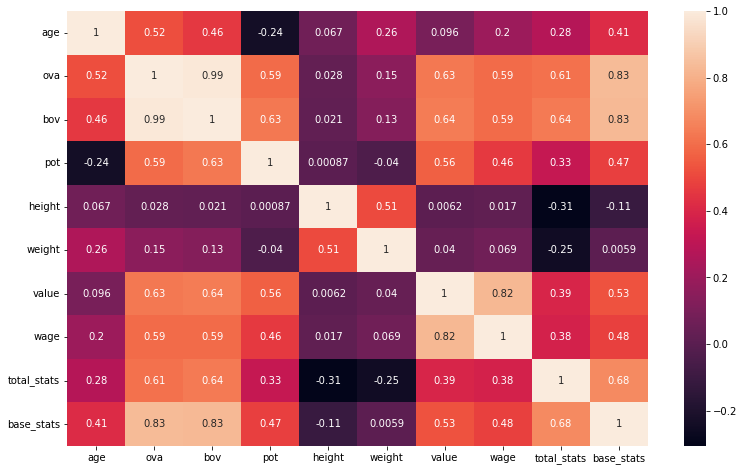

In [49]:
plt.figure( figsize = (13,8))
sns.heatmap(cor_matrix,annot=True)
plt.show()

In [50]:
fifa = fifa.drop(['bov'], axis = 1)

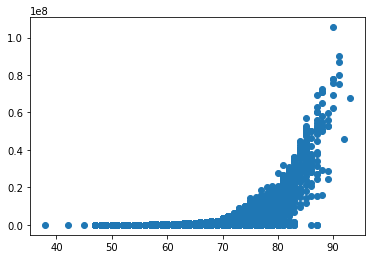

In [53]:
plt.scatter(x=fifa['ova'], y=fifa['value'])
plt.show()

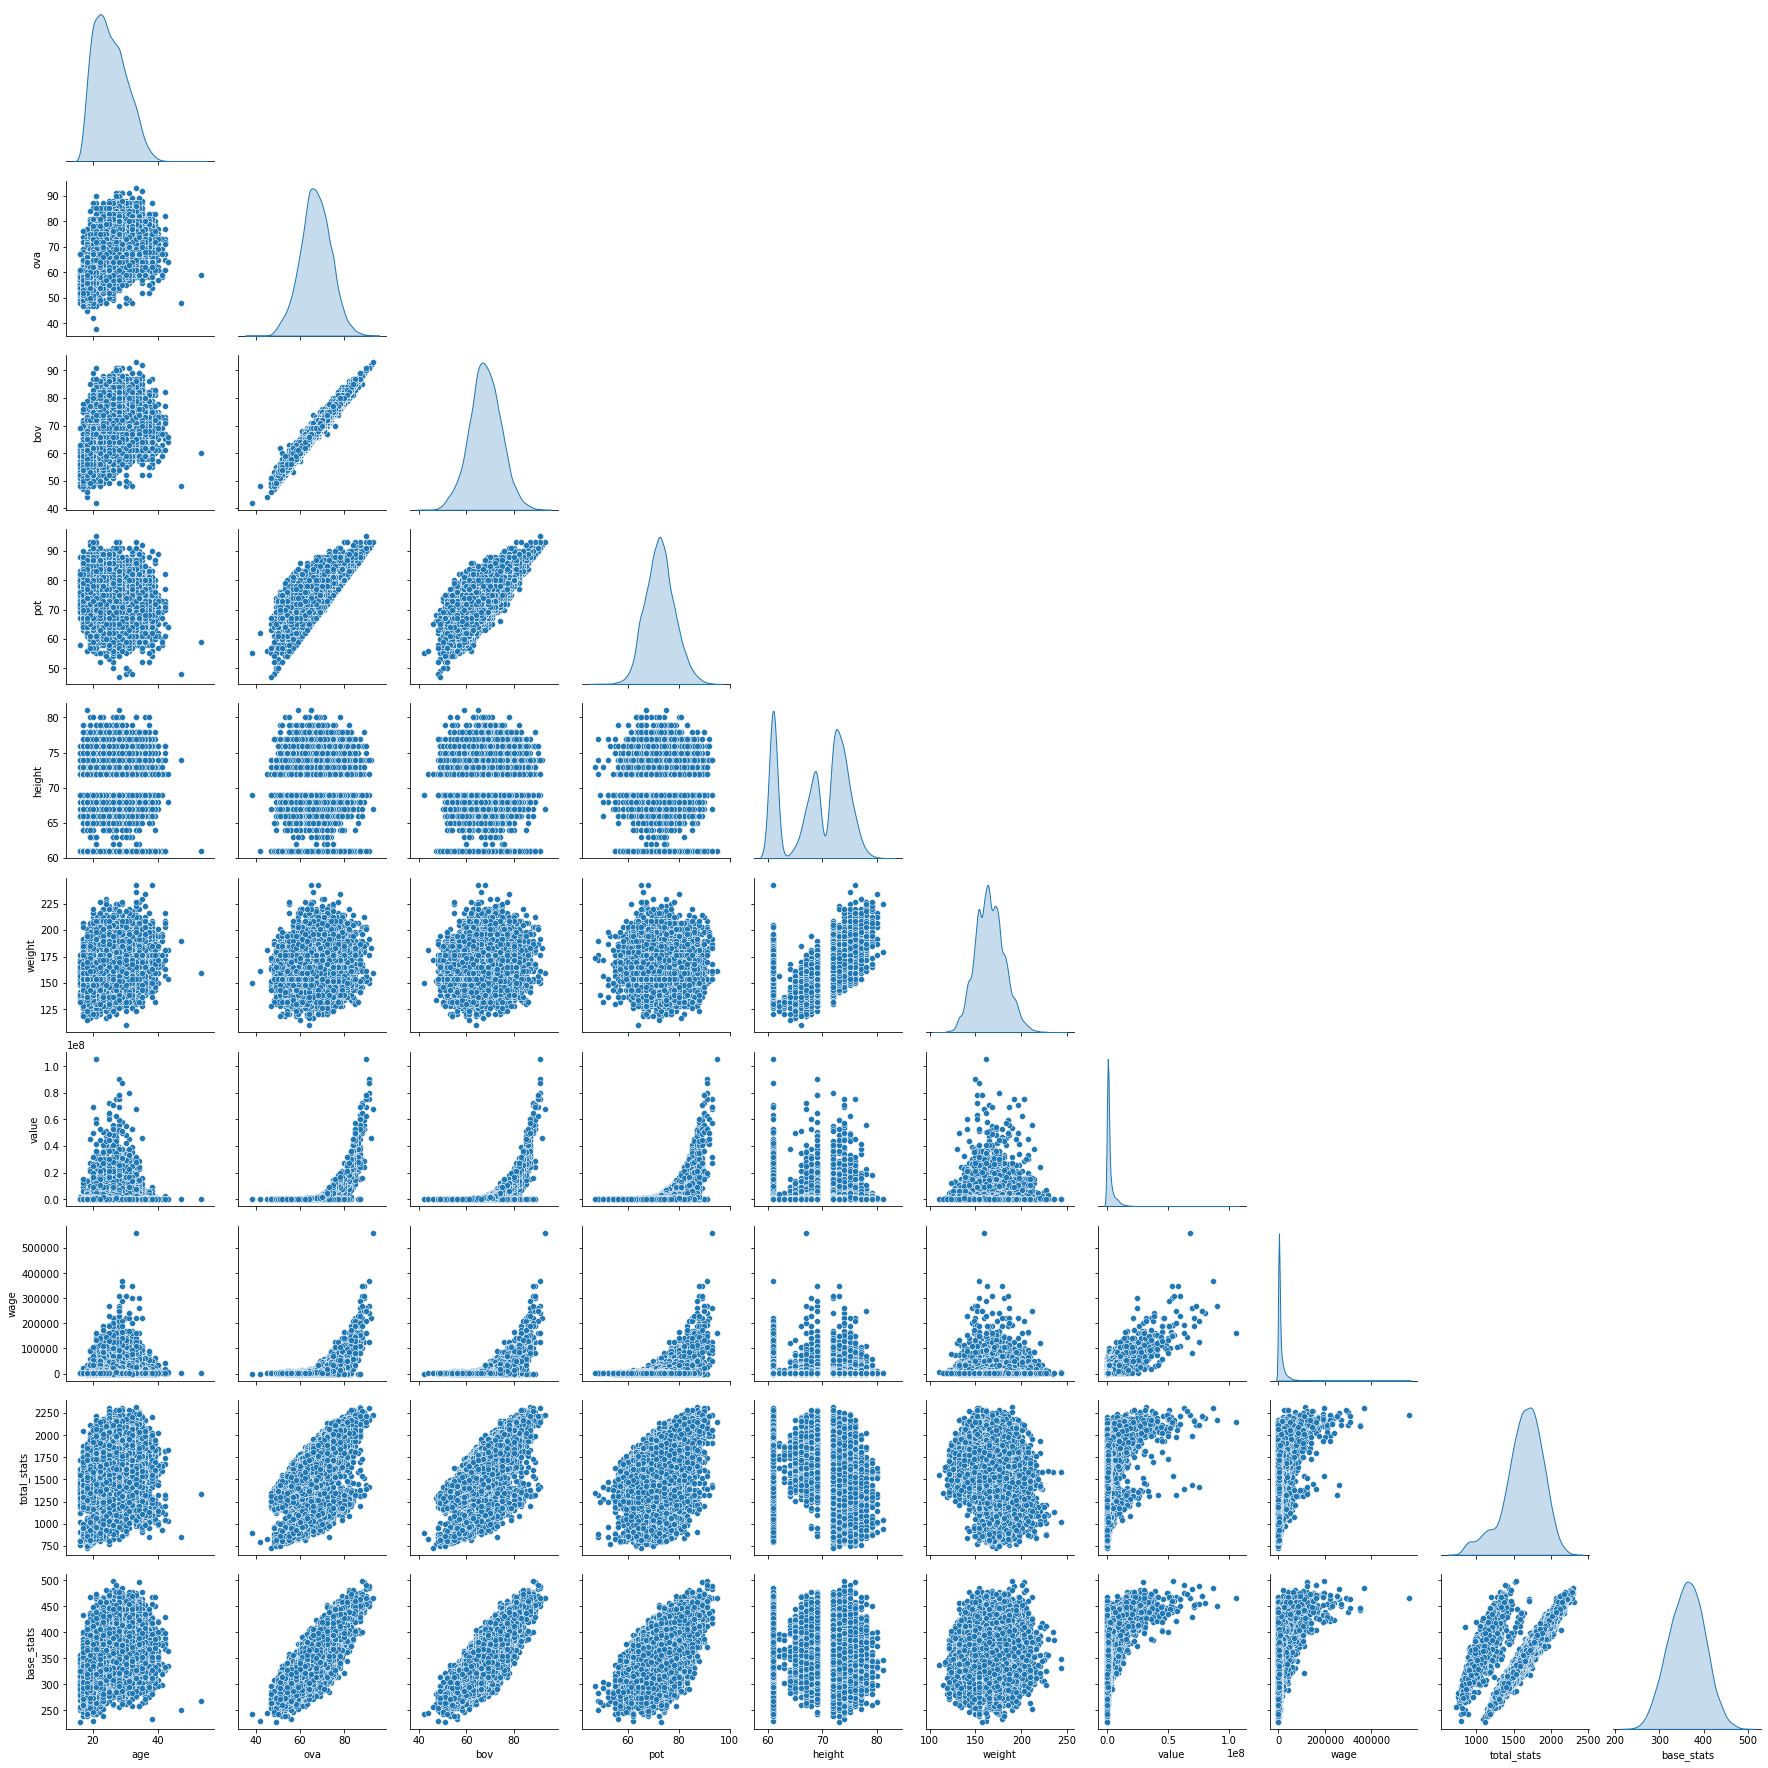

In [54]:
sns.pairplot(fifa_numerical, diag_kind = 'kde', corner=True)

<AxesSubplot:>

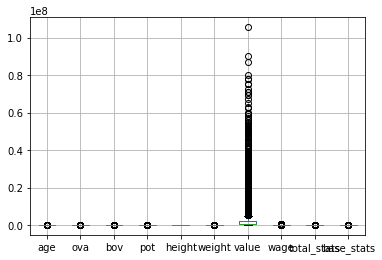

In [58]:

fifa_numerical.boxplot()

In [ ]:
## CREATING MODEL

In [59]:
y = fifa_numerical['ova']
x = fifa_numerical.drop(['ova'], axis=1)

In [70]:
from sklearn.preprocessing import MinMaxScaler

In [72]:
MinMax = MinMaxScaler().fit(fifa_numerical)
x_normalized = MinMax.transform(fifa_numerical)
x_normalized = pd.DataFrame(x_normalized,columns=fifa_numerical.columns)
x_normalized.head()

,age,ova,bov,pot,height,weight,value,wage,total_stats,base_stats
0,0.459459,0.563636,0.568627,0.458333,0.55,0.533835,0.005924,0.012500,0.755836,0.666667
1,0.567568,0.600000,0.549020,0.500000,0.00,0.248120,0.005687,0.012500,0.741325,0.581481
2,0.459459,0.600000,0.568627,0.500000,0.40,0.383459,0.010427,0.026786,0.655521,0.466667
3,0.540541,0.545455,0.549020,0.729167,0.00,0.413534,0.000000,0.000000,0.389274,0.522222
4,0.540541,0.781818,0.784314,0.708333,0.30,0.300752,0.052133,0.021429,0.809464,0.711111


In [74]:
Standardtransformer = StandardScaler().fit(fifa_numerical)
x_standardized = Standardtransformer.transform(fifa_numerical)
x_standardized = pd.DataFrame(x_standardized,columns=fifa_numerical.columns)
x_standardized.head()

,age,ova,bov,pot,height,weight,value,wage,total_stats,base_stats
0,1.563385,0.296466,0.467024,-0.604843,0.572228,0.969870,-0.361543,-0.167083,1.143632,1.158424
1,2.372689,0.587835,0.316361,-0.258209,-1.485921,-1.432498,-0.366196,-0.167083,1.055289,0.587011
2,1.563385,0.587835,0.467024,-0.258209,0.010915,-0.294534,-0.273129,0.211261,0.532914,-0.183154
3,2.170363,0.150781,0.316361,1.648276,-1.485921,-0.041653,-0.477877,-0.498134,-1.087985,0.189507
4,2.170363,2.044685,2.124313,1.474959,-0.363294,-0.989957,0.545862,0.069382,1.470116,1.456552


In [ ]:
# splittin and traning model

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1000)

In [77]:
lm = linear_model.LinearRegression()
model = lm.fit(x_train, y_train)

In [78]:
predictions = lm.predict(x_test)
r2_score(y_test, predictions)

0.9799925150030793

In [79]:
mse = mean_squared_error(y_test, predictions)
mse

0.9272140911637035

In [81]:
rmse = math.sqrt(mse)
rmse

0.962919566300168

In [80]:
r2 = r2_score(y_test, predictions)
r2

0.9799925150030793